In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
data = pd.read_csv(r"D:\Python\Regression\Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [5]:
data['Salary'].max()
data.Salary.nlargest()

28    122391.0
29    121872.0
26    116969.0
23    113812.0
27    112635.0
Name: Salary, dtype: float64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data.duplicated().sum()

0

YearsExperience


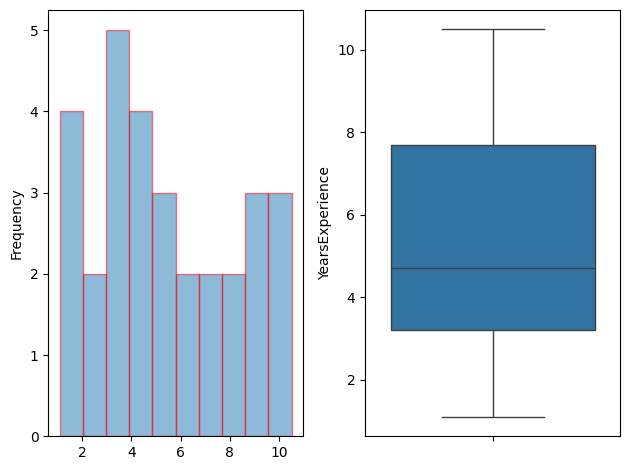

Salary


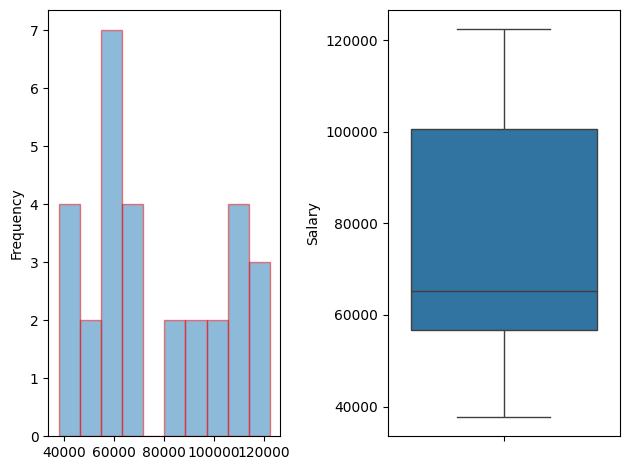

In [12]:
for col in data.columns:
    print(col)
    plt.subplot(1,2,1)
    data[col].hist(bins=10, alpha=0.5, grid=False, edgecolor='red')
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    sns.boxplot(y=data[col])

    plt.tight_layout()
    plt.show()

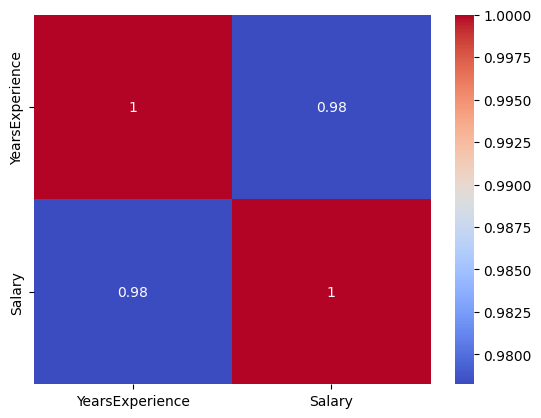

In [11]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

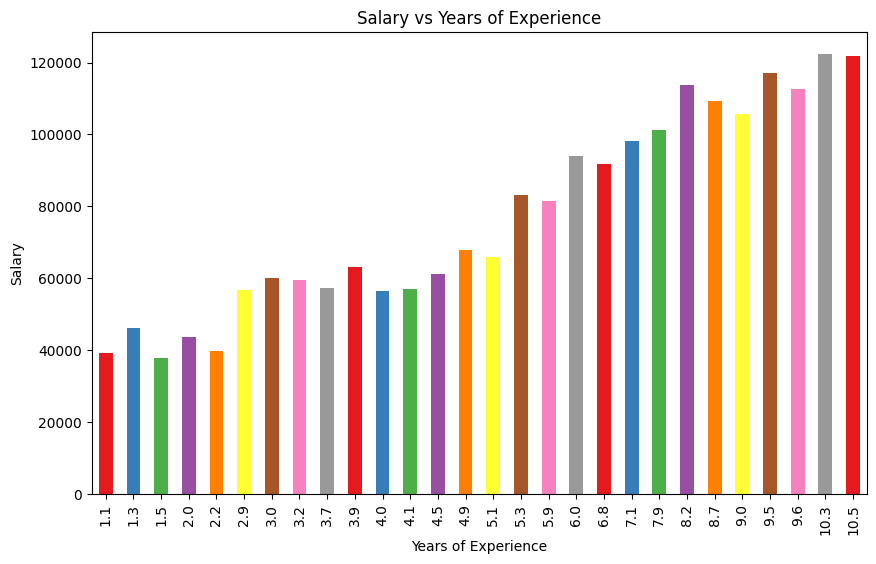

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
year_analysis = data.groupby('YearsExperience')['Salary'].mean()
year_analysis.plot(kind='bar', figsize=(10, 6), color=sns.color_palette('Set1'))
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')  
plt.show()

In [16]:
# Assuming you have a DataFrame named 'data' with columns 'income' and 'happiness'
X = data['YearsExperience']
y = data['Salary']

In [17]:
# Add a constant term to the independent variable (income)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           1.14e-20
Time:                        09:45:42   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

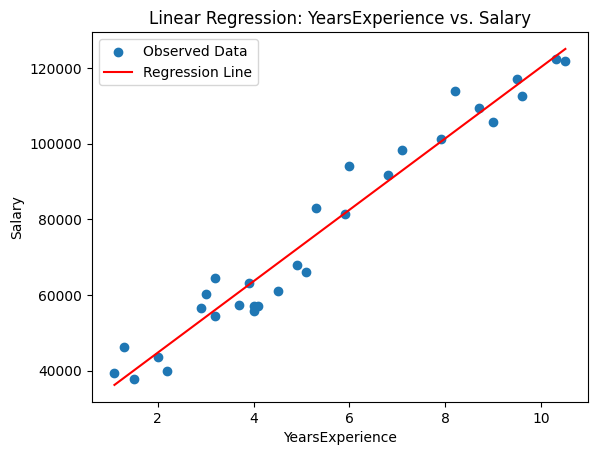

In [15]:
# Predicted values based on the model
y_pred = model.predict(X)

# Scatter plot of the data points
plt.scatter(data['YearsExperience'], data['Salary'], label='Observed Data')

# Plot the regression line
plt.plot(data['YearsExperience'], y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression: YearsExperience vs. Salary')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [20]:
YE = int(input("Enter the Year Of Exprience: "))
print(YE)
new_data_point = [1,YE]
pridicted_value = model.predict(new_data_point)
pridicted_value[0]

20


214791.44662777026

Another Method

In [21]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [23]:
X_test

,const,YearsExperience
27,1.0,9.6
15,1.0,4.9
23,1.0,8.2
17,1.0,5.3
8,1.0,3.2
9,1.0,3.7


In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([115790.21011287,  71498.27809463, 102596.86866063,  75267.80422384,
        55477.79204548,  60189.69970699])

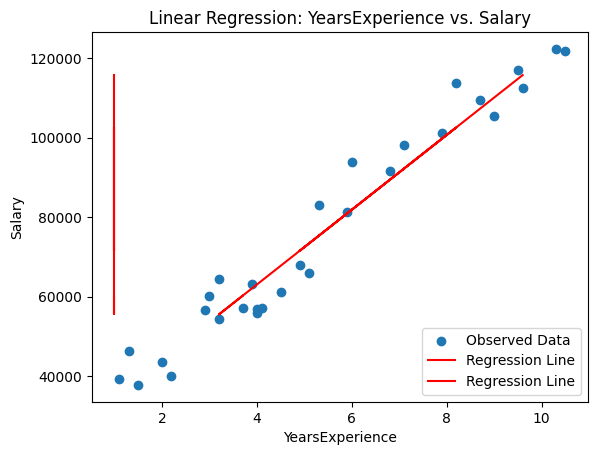

In [25]:
# Plotting the observed data points
plt.scatter(data['YearsExperience'], data['Salary'], label='Observed Data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', label='Regression Line')

# Set labels and title
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Linear Regression: YearsExperience vs. Salary')

# Display legend
plt.legend()

In [20]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 49830096.8559
Root Mean Squared Error (RMSE): 7059.0436
Mean Absolute Error (MAE): 6286.4538
R-squared (R²): 0.9024


In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
new_data = [[1,15]]
y_pred = model.predict(new_data)
y_pred[0]

166678.8128572415